### Final Project: Foundations of Machine Learning SoSe 2025
#### "Building a Multilayer Perceptron to classify traffic signs"
Dataset: The German Traffic Sign Recognition Benchmark

Belana Floßbach, Melina Immke, Jeremy Uzoagba


In [2]:
# import libraries

import os
import cv2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


### Import Images:

In [ ]:
#import pictures

current_working_directory = str(os.getcwd())
print(current_working_directory)

# for this we used the readTrafficSigns utility function that was shipped with the dataset
# It is in a .py File called readTrafficSigns that lies in the same folder as this notebook

# from readTrafficSigns import readTrafficSigns
from readTrafficSigns1 import readTrafficSigns # the readTrafficSigns1 file is modified such that we only read in the first 5 classes (for computation-power related reasons)

# add file path to data on your machine here:
trainImages, trainLabels = readTrafficSigns(current_working_directory + "/Images") 
# trainImages, trainLabels = readTrafficSigns(r"C:\Users\PC\Foundations of Machine Learning\FinalTesting\data\GTSRB\Final_Training\Images") # hier muss jeder immer seinen Lokalen Pfad angeben, das ggf mit syspath oder so cleaner machen


c:\Users\PC\Foundations of Machine Learning\Final Project


1


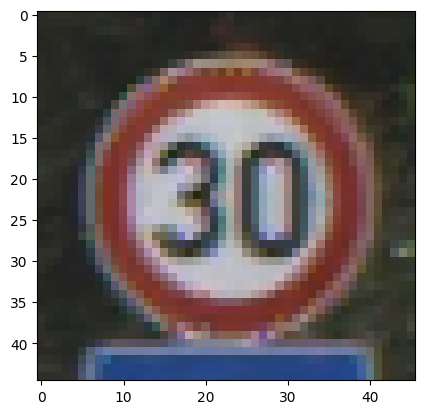

In [6]:
#TESTCELL to check if import worked, remove for final version?



plt.imshow(trainImages[500])

print(trainLabels[500])

### Preprocessing:

In [7]:
# find the size of the biggest picture 


max_pixel_x = 0
max_pixel_y = 0


for i in range(len(trainImages)):
    pixel_x = trainImages[i].shape[0]
    pixel_y = trainImages[i].shape[1]

    if pixel_x > max_pixel_x:
        max_pixel_x = pixel_x
        index = i 
    if pixel_y > max_pixel_y:
        max_pixel_y = pixel_y

print(max_pixel_x, max_pixel_y)

171 171


(171, 171, 3)


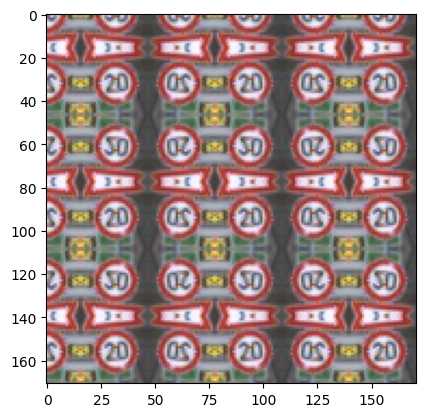

In [8]:
# mirrored version:



#makes all images the same pixel size
resized_images_mirrored = []

#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y
    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,border_x,0, border_y,0,cv2.BORDER_REFLECT) 
    #save new image with borders
    resized_images_mirrored.append(img)

plt.imshow(resized_images_mirrored[5])
print(resized_images_mirrored[3].shape)

Dimensions of the normlized image:(171, 171)
 Example of normalized values:[[0.7254902  0.42352941 0.61568627 ... 0.36470588 0.36862745 0.36470588]
 [0.59607843 0.45098039 0.83529412 ... 0.34117647 0.37254902 0.3372549 ]
 [0.47843137 0.47058824 0.61568627 ... 0.31764706 0.33333333 0.3254902 ]
 ...
 [0.50588235 0.45490196 0.40392157 ... 0.27843137 0.28627451 0.29019608]
 [0.45882353 0.35294118 0.34117647 ... 0.25490196 0.28627451 0.34117647]
 [0.41176471 0.35686275 0.34117647 ... 0.27058824 0.28627451 0.34901961]]


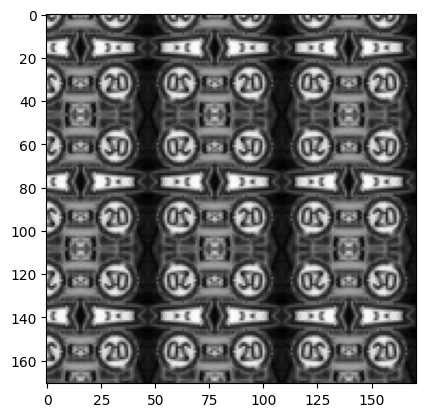

In [9]:
#conversion to grey scale and normalization for mirrored images

normalized_images_mirrored = []
grey_scale_images_mirrored = []

for i in range(len(resized_images_mirrored)):

    #conversion to greyscale reduces dimensiomns from 3 to 2
    grey_scale_images_mirrored.append(cv2.cvtColor(resized_images_mirrored[i], cv2.COLOR_RGB2GRAY))  # Convert to grayscale
    normalized_images_mirrored.append(grey_scale_images_mirrored[i] / 255.0)  # Normalize pixel values to [0, 1]

#plot gray scale image and show normalized values of image
plt.imshow(grey_scale_images_mirrored[5], cmap='gray')
print(f"Dimensions of the normlized image:{normalized_images_mirrored[3].shape}\n",f"Example of normalized values:{normalized_images_mirrored[3]}")


(171, 171, 3)


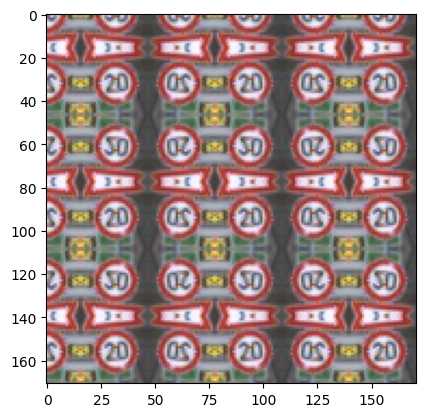

In [10]:
#padded version:

#makes all images the same pixel size
resized_images_padded = []


#go through all images and resize them to 225 x 243 pixels by making reflecting borders
for i in range(len(trainImages)):
    img = trainImages[i]
    pixel_x = trainImages[i].shape[0] #gets pixel size of image
    pixel_y = trainImages[i].shape[1]
    border_x = max_pixel_x - pixel_x  #calculates border size
    border_y = max_pixel_y - pixel_y

    # alligns padding so that picture is displayed in the middle
    top = border_x // 2
    bottom = border_x - top
    left = border_y // 2
    right = border_y - left

    #actually adding the border to the image
    img = cv2.copyMakeBorder(img,top,bottom, left,right,cv2.BORDER_CONSTANT, value=[255, 255, 255]) 
    #save new image with borders
    resized_images_padded.append(img)

plt.imshow(resized_images_mirrored[5])
print(resized_images_padded[7].shape)

Dimensions of the normlized image:(171, 171)
 Example of normalized values:[[0.7254902  0.42352941 0.61568627 ... 0.36470588 0.36862745 0.36470588]
 [0.59607843 0.45098039 0.83529412 ... 0.34117647 0.37254902 0.3372549 ]
 [0.47843137 0.47058824 0.61568627 ... 0.31764706 0.33333333 0.3254902 ]
 ...
 [0.50588235 0.45490196 0.40392157 ... 0.27843137 0.28627451 0.29019608]
 [0.45882353 0.35294118 0.34117647 ... 0.25490196 0.28627451 0.34117647]
 [0.41176471 0.35686275 0.34117647 ... 0.27058824 0.28627451 0.34901961]]


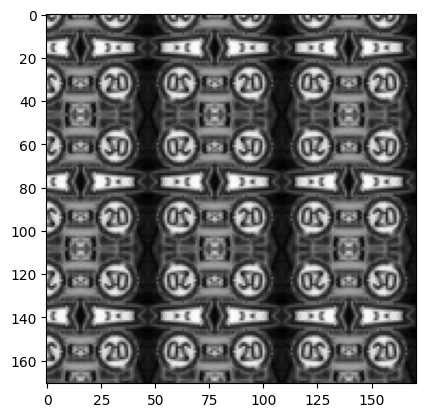

In [11]:
#conversion to grey scale and normalization for padded images

normalized_images_padded = []
grey_scale_images_padded = []

for i in range(len(resized_images_padded)):

    #conversion to greyscale reduces dimensiomns from 3 to 2
    grey_scale_images_padded.append(cv2.cvtColor(resized_images_mirrored[i], cv2.COLOR_RGB2GRAY))  # Convert to grayscale
    normalized_images_padded.append(grey_scale_images_padded[i] / 255.0)  # Normalize pixel values to [0, 1]

#plot gray scale image and show normalized values of image
plt.imshow(grey_scale_images_padded[5], cmap='gray')
print(f"Dimensions of the normlized image:{normalized_images_padded[3].shape}\n",f"Example of normalized values:{normalized_images_padded[3]}")


In [12]:
# loading labels

trainLabels_array = np.array(trainLabels,dtype=int, ndmin=2)
print(trainLabels_array, trainLabels_array.shape)

#one hot encoding labels
num_classes = trainLabels_array.max() + 1  
trainLabels_one_hot= np.zeros((trainLabels_array.size, num_classes))

trainLabels_one_hot[np.arange(trainLabels_array.size), trainLabels_array] = 1 # this is the one hot encoded array


print(trainLabels_one_hot.shape, trainLabels_one_hot, type(trainLabels_one_hot))

[[0 0 0 ... 4 4 4]] (1, 8070)
(8070, 5) [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] <class 'numpy.ndarray'>


### Split into Training, Validation and Test Sets:

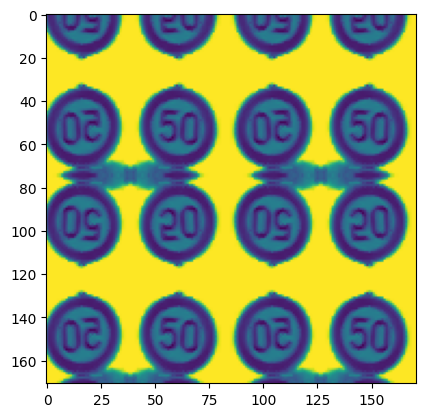

In [13]:
# Split into Test, Validation and Training Sets
# for mirrored images

X_train_mirrored, X_test_mirrored, y_train_mirrored, y_test_mirrored = train_test_split(normalized_images_mirrored, trainLabels_one_hot , random_state=1,test_size=0.20, shuffle=True)
X_train_mirrored, X_val_mirrored, y_train_mirrored, y_val_mirrored = train_test_split(X_train_mirrored, y_train_mirrored, random_state=1, test_size=0.20, shuffle=True)

plt.imshow(X_train_mirrored[500])

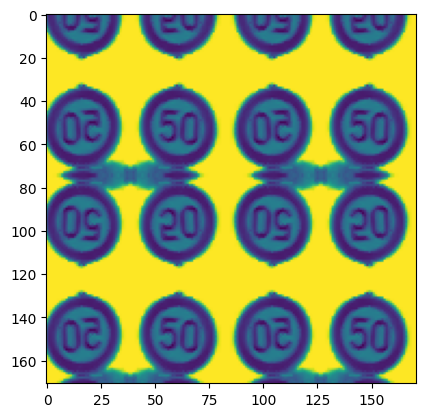

In [32]:
# Split into Test, Validation and Training Sets
# for padded images

X_train_padded, X_test_padded, y_train_padded, y_test_padded = train_test_split(normalized_images_padded, trainLabels_one_hot , random_state=1,test_size=0.20, shuffle=True)
X_train_padded, X_val_padded, y_train_padded, y_val_padded = train_test_split(X_train_padded, y_train_padded, random_state=1, test_size=0.20, shuffle=True)

plt.imshow(X_train_padded[500])

### Prepare Input data for MLP:

In [40]:
# make the input data from lists to np.arrays and flatten it
# for mirrored images

X_train_mirrored = np.array([img.flatten() for img in X_train_mirrored], dtype=np.float32)
X_test_mirrored = np.array([img.flatten() for img in X_test_mirrored], dtype=np.float32)
X_val_mirrored = np.array([img.flatten() for img in X_val_mirrored], dtype=np.float32)

print(X_val_mirrored[1])

[0.1764706  0.16470589 0.16470589 ... 0.10196079 0.10196079 0.09411765]


In [38]:
# make the input data from lists to np.arrays and flatten it
# for padded images

X_train_padded = np.array([img.flatten() for img in X_train_padded], dtype=np.float32)
X_test_padded = np.array([img.flatten() for img in X_test_padded], dtype=np.float32)
X_val_padded = np.array([img.flatten() for img in X_val_padded], dtype=np.float32)

print(X_val_padded[1])

[0.1764706  0.16470589 0.16470589 ... 0.10196079 0.10196079 0.09411765]


### Baseline Model (MPL)

In [15]:
#Baseline Neural Network (Multilayer Perceptron)

"""Multi layer Perceptron to be used for image classification

Input: (greyscaled) image as flattened array

Output: vector of class probabilities (given by softmax?)

"""


class MLP:
    def __init__(self, input_length, length_hidden_layer, length_output_layer):
        
        # layers = weight matrixes with dimensions: previous layer x next layer
        self.weights_input_hidden = np.random.randn(input_length, length_hidden_layer)
        self.weights_hidden_output = np.random.randn(length_hidden_layer, length_output_layer) 

        # biases to add
        self.bias_hidden = np.zeros((1,length_hidden_layer))
        self.bias_output = np.zeros((1,length_output_layer))
        

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def ReLu(self, x): # input is matrix
        return x * (x > 0) # matrix mult. between x and 0|1 / True|False matrix -> 0 if > 0, else just the number
    """def relu1(a):
    return np.maximum(0, a"""


    def forward_pass(self, X):
        
        # hidden layer calculations
        self.input_hidden_layer = np.matmul(X, self.weights_input_hidden) + self.bias_hidden
        self.output_hidden_layer = self.ReLu(self.input_hidden_layer)

        # output layer calculations
        self.output_layer = np.dot(self.output_hidden_layer, self.weights_hidden_output) + self.bias_output
        self.final_output = self.softmax(self.output_layer)
       
        
        return self.final_output
    
    # y = taget Labels

    def backward_pass(self, X, y, output, learning_rate):

        m = X.shape[0]

        output_error = output - y  # Shape: (N, C)
        relu_derivative = (self.input_hidden_layer > 0).astype(float)  # Shape: (N, H)
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * relu_derivative  # Shape: (N, H)
    
        # Gradients
      
        dW_hidden_output = np.dot(self.output_hidden_layer.T, output_error) / m # DebugLoss: Gradienten normalisieren (teilen durch Batchgröße) 
        db_output = np.sum(output_error, axis=0, keepdims=True) / m
        dW_input_hidden = np.dot(X.T, hidden_error) / m
        db_hidden = np.sum(hidden_error, axis=0, keepdims=True) / m
        
        
        # Update weights and biases
        self.weights_hidden_output -= learning_rate * dW_hidden_output
        self.bias_output -= learning_rate * db_output

        self.weights_input_hidden -= learning_rate * dW_input_hidden
        self.bias_hidden -= learning_rate * db_hidden
    

    def train(self, X, y, epochs, learning_rate):

        for epoch in range(epochs):
            output = self.forward_pass(X)

            self.backward_pass(X, y, output, learning_rate)

            #if (epoch + 1) % 10 == 0 or epoch == 0:
            loss = -np.sum(y * np.log(output + 1e-15)) /(len(y))
            print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')



    def predict(self, X):
        output = self.forward_pass(X)
        return np.argmax(output, axis=1)



In [41]:
# Training the network on the mirrored data 

network = MLP(len(X_train_mirrored[1]),10, 5) 

train = network.train(X_train_mirrored, y_train_mirrored, 50, 0.05)

Epoch 1, Loss: 32.1924
Epoch 2, Loss: 24.0796
Epoch 3, Loss: 21.4975
Epoch 4, Loss: 6.0453
Epoch 5, Loss: 2.8700
Epoch 6, Loss: 2.6277
Epoch 7, Loss: 2.4776
Epoch 8, Loss: 2.3683
Epoch 9, Loss: 2.2788
Epoch 10, Loss: 2.2083
Epoch 11, Loss: 2.1521
Epoch 12, Loss: 2.1017
Epoch 13, Loss: 2.0558
Epoch 14, Loss: 2.0142
Epoch 15, Loss: 1.9757
Epoch 16, Loss: 1.9425
Epoch 17, Loss: 1.9155
Epoch 18, Loss: 1.8919
Epoch 19, Loss: 1.8713
Epoch 20, Loss: 1.8519
Epoch 21, Loss: 1.8353
Epoch 22, Loss: 1.8208
Epoch 23, Loss: 1.8075
Epoch 24, Loss: 1.7954
Epoch 25, Loss: 1.7850
Epoch 26, Loss: 1.7746
Epoch 27, Loss: 1.7649
Epoch 28, Loss: 1.7558
Epoch 29, Loss: 1.7463
Epoch 30, Loss: 1.7372
Epoch 31, Loss: 1.7289
Epoch 32, Loss: 1.7210
Epoch 33, Loss: 1.7136
Epoch 34, Loss: 1.7067
Epoch 35, Loss: 1.6999
Epoch 36, Loss: 1.6935
Epoch 37, Loss: 1.6875
Epoch 38, Loss: 1.6821
Epoch 39, Loss: 1.6767
Epoch 40, Loss: 1.6715
Epoch 41, Loss: 1.6668
Epoch 42, Loss: 1.6624
Epoch 43, Loss: 1.6581
Epoch 44, Loss: 1

In [ ]:
# Training the network on the padded data 

network = MLP(len(X_train_padded[1]),10, 5) 

train = network.train(X_train_padded, y_train_padded, 50, 0.05)

Epoch 1, Loss: 22.9048
Epoch 2, Loss: 24.7527
Epoch 3, Loss: 25.3577
Epoch 4, Loss: 3.9660
Epoch 5, Loss: 3.1477
Epoch 6, Loss: 2.8151
Epoch 7, Loss: 2.6274
Epoch 8, Loss: 2.5012
Epoch 9, Loss: 2.4002
Epoch 10, Loss: 2.3149
Epoch 11, Loss: 2.2464
Epoch 12, Loss: 2.1911
Epoch 13, Loss: 2.1470
Epoch 14, Loss: 2.1082
Epoch 15, Loss: 2.0755
Epoch 16, Loss: 2.0467
Epoch 17, Loss: 2.0218
Epoch 18, Loss: 2.0008
Epoch 19, Loss: 1.9830
Epoch 20, Loss: 1.9665
Epoch 21, Loss: 1.9521
Epoch 22, Loss: 1.9382
Epoch 23, Loss: 1.9250
Epoch 24, Loss: 1.9126
Epoch 25, Loss: 1.9007
Epoch 26, Loss: 1.8900
Epoch 27, Loss: 1.8798
Epoch 28, Loss: 1.8700
Epoch 29, Loss: 1.8608
Epoch 30, Loss: 1.8517
Epoch 31, Loss: 1.8427
Epoch 32, Loss: 1.8341
Epoch 33, Loss: 1.8258
Epoch 34, Loss: 1.8177
Epoch 35, Loss: 1.8097
Epoch 36, Loss: 1.8020
Epoch 37, Loss: 1.7950
Epoch 38, Loss: 1.7882
Epoch 39, Loss: 1.7815
Epoch 40, Loss: 1.7750
Epoch 41, Loss: 1.7686
Epoch 42, Loss: 1.7624
Epoch 43, Loss: 1.7567
Epoch 44, Loss: 1

-> mirrored version hat minimal kleineren Loss, als nächstes muss man untersuchen ob es auch auf dem Testset besser performt, könnte z.B. sein, dass es mehr nur mehr data zum darauf trainieren hat (durch das spiegeln erzeugte visual noise), aber das nicht hilft beim predicten von Verkehrszeichen ohne diese noise
-> bzw. es kommt drauf an, normalized man das Testset genauso wie das training set? dann kommt es ja aufs selbe raus weil die bilder trotzdem mit mirroring/padding preprocessed werden -> richtiges vorgehen rausfinden, evtl doch das test set nehmen?

=> bin gespannt was hier rauskommt hehe

In [16]:
# Hyperparameter search  
#TODO


In [17]:
# evaluation of performance
#TODO

# -> Accuracy, Recall, F1 etc
# -> confusion matrix?
# -> loss kurven
# -> ablation study?

### Incremental improvement

In [18]:
#Improved MLP
#TODO !!! Mehr Layer(s)?


In [19]:
# evaluation Improved MLP
# TODO

In [21]:
# Hyperparameter search  
#TODO

In [20]:
# evaluation of performance improved MLP
# TODO

Comparison und conclusion:

In [22]:
# TODO
# -> hier vllt die Kurven nebeneinander plotten?
# kurz beschreiben, dass das improved mlp besser ist